<a href="https://colab.research.google.com/github/noeyxos/MS-AI-SCHOOL/blob/main/DL_Keras_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from keras.datasets import reuters    # 뉴스기사 분류 로이터 데이터 셋
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)   #빈도가 높은 상위 10000개의 단어만 다룬다

In [21]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [36]:
import numpy as np

# 문자를 숫자 배열로 만드는 함수 생성
def vectorize_sequences(sequences, dimension=10000):
  # 크기가 (len(sequences), dimension) 이고 모든 원소가 0 인 행렬을 만든다.
  results = np.zeros((len(sequences), dimension))

  for i , sequence in enumerate(sequences):
    results[i, sequence] = 1  #results[i]에서 특정 인덱스의 위치를 1로 만든다.

  return results

In [37]:
# 훈련 데이터와 테스트 데이터의 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
# 라벨 데이터를 카테고리 데이터로 전환
from keras.utils.np_utils import to_categorical


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [39]:
# 모델 구성
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 여러개 중 하나를 출력하는 활성화 함수

In [40]:
model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 194ms/step - loss: 2.8928 - accuracy: 0.4295 - val_loss: 1.9401 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 58ms/step - loss: 1.5635 - accuracy: 0.6885 - val_loss: 1.3825 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.1646 - accuracy: 0.7414 - val_loss: 1.1719 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.9517 - accuracy: 0.7915 - val_loss: 1.0713 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7965 - accuracy: 0.8254 - val_loss: 0.9887 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6699 - accuracy: 0.8548 - val_loss: 0.9399 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5645 - accuracy: 0.8802 - val_loss: 0.9009 - val_accuracy: 0.8110
Epoch 8/20
1

In [43]:
import matplotlib.pyplot as plt

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

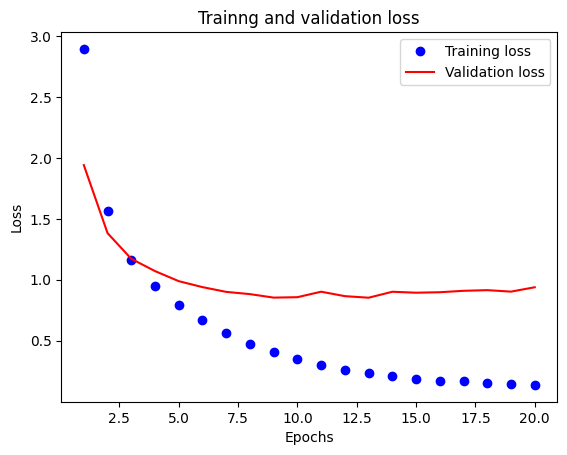

In [45]:
epochs = range(1 , len(loss)+1) # 반복횟수

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation loss')
plt.title('Trainng and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

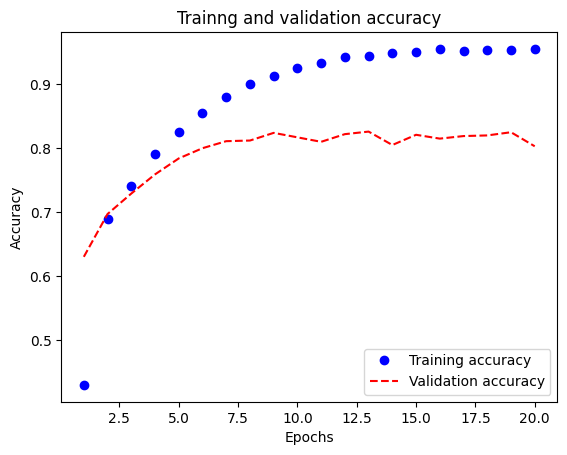

In [46]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r--', label = 'Validation accuracy')
plt.title('Trainng and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [47]:
# 검증된 결과로 다시 학습
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 여러개 중 하나 

model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,  # 학습용 데이터
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val)) # 검증용 데이터

eval_result = model.evaluate(x_test, one_hot_test_labels) # 테스트용 데이터
print(eval_result)

Epoch 1/20
16/16 [==============================] - 2s 71ms/step - loss: 2.6748 - accuracy: 0.4446 - val_loss: 1.8170 - val_accuracy: 0.5980
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 1.5424 - accuracy: 0.6620 - val_loss: 1.3866 - val_accuracy: 0.6840
Epoch 3/20
16/16 [==============================] - 1s 73ms/step - loss: 1.1922 - accuracy: 0.7390 - val_loss: 1.1899 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 2s 96ms/step - loss: 0.9763 - accuracy: 0.7923 - val_loss: 1.1005 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 82ms/step - loss: 0.8248 - accuracy: 0.8234 - val_loss: 1.0184 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.6969 - accuracy: 0.8485 - val_loss: 0.9716 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5890 - accuracy: 0.8698 - val_loss: 0.9369 - val_accuracy: 0.8010
Epoch 8/20
16